# Customer Satisfaction Ecommerce

O objetivo deste projeto prático é prever a satisfação do cliente a partir de um conjunto de dados de ecommerce do Brasil.

Dados podem ser baixados aqui: https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

Colunas da tabela:

1. **order_status**: status do pedido (entregue ou cancelado) (delivered or canceled).

2. **order_purchase_timestamp**: timestamp (data/hora) da compra de cada item.

3. **order_delivered_customer_date**: data real de entrega do pedido do cliente.

4. **order_estimated_delievy_date**: data de entrega estimada que foi fornecida ao cliente no momento da compra.

5. **shipping_limit_date**: data limite de envio do vendedor para a transferência do pedido ao parceiro logístico.

6. **payment_sequential**: método de pagamento utilizado pelo consumidor.

7. **payment_type**: método de pagamento preferido do cliente.

8. **payment_installments**: número de parcelas de pagamento preferido do cliente.

9. **payment_value**: valor da transação.

10. **price**: custo de cada item.

11. **freight_value**: custo de transporte para cada item (se um pedido tiver mais de um item, o valor do frete é dividido entre os itens).

12. **product_category**: categoria de cada item.

13. **product_name_length**: número de caracteres extraídos do nome do produto.

14. **product_description_length**: número de caracteres extraídos da descrição do produto.

15. **product_photos_qty**: número de fotos de produtos que foram publicadas.

16. **review_score**: classificação dada por um cliente em uma pesquisa de satisfação que varia de 1 a 5.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregamento dos dados

Vamos carregar os dados de um diretório do GitHub. Poderíamos também carregar através de um diretório nosso no Google Drive. 
São várias tabelas em csv. Vamos carregar uma por uma.

In [ ]:
# definição do caminho dos arquivos para ler os dados
diretorio = 'https://raw.githubusercontent.com/andressaapio/pythontutorials/main/data/olist/' 

In [ ]:
# carrega dataset com infos sobre os pedidos: olist_orders_dataset.csv
orders = pd.read_csv(diretorio + 'olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
# carrega dataset com infos sobre as avaliações dos pedidos: olist_order_reviews_dataset.csv
order_reviews = pd.read_csv(diretorio + 'olist_order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [ ]:
# carrega dataset com infos sobre os pedidos: olist_order_payments_dataset.csv
order_payments = pd.read_csv(diretorio + 'olist_order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# carrega dataset do consumidor: olist_customers_dataset.csv
customer = pd.read_csv(diretorio + 'olist_customers_dataset.csv')
customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
# carrega dataset com os itens dos pedidos: olist_order_items_datase.csv
order_items = pd.read_csv(diretorio + 'olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
# carrega dataset com infos sobre os produtos: olist_products_dataset.csv
products = pd.read_csv(diretorio + 'olist_products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [ ]:
# carrega dataset sobre os vendedores: olist_sellers_dataset.csv
sellers = pd.read_csv(diretorio + 'olist_sellers_dataset.csv')
sellers.head()


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [ ]:
# carrega dataset com a tradução dos produtos:  product_category_name_translation
product_translation = pd.read_csv(diretorio + 'product_category_name_translation.csv')
product_translation

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


## Merge dos datasets

Fica difícil trabalhar com várias tabelas, certo? Mas é geralmente assim que acontece no mundo real. O ideal é criarmos uma tabela só com todas as informações que vamos utilizar para a nossa análise. Felizmente temos a função Merge que faz isso para a gente.

### Merge de todos os datasets referentes ao consumidor

In [ ]:
# A = olist_orders_dataset.csv, olist_order_reviews_dataset.csv, olist_order_payments_dataset.csv
# em order_id

# customer_df = A e olist_customers_dataset.csv em customer_id

A = pd.merge(orders, order_reviews, on='order_id')
A = pd.merge(A, order_payments,on='order_id')
A = pd.merge(A, customer,on='customer_id')
A.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


### Merge de todos os datasets referentes ao vendedor 

In [ ]:
# B = olist_order_items_dataset e olist_products_dataset em product_id
# C = B e olist_sellers_dataset em seller_id
# seller_df = C e product_category_name_translation.csv em product_category_name

B = pd.merge(order_items,products,on='product_id')
B = pd.merge(B,sellers,on='seller_id')
B = pd.merge(B,product_translation,on='product_category_name')
B.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff


### Merge dos datasets do consumidor e do vendedor

In [ ]:
# df_ecommerce = merge do customer_df e do seller_df em order_id
df_ecommerce = pd.merge(A, B, on = 'order_id')
df_ecommerce.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,...,268.0,4.0,500.0,19.0,8.0,13.0,9350,maua,SP,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,...,178.0,1.0,400.0,19.0,13.0,19.0,31570,belo horizonte,SP,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,...,232.0,1.0,420.0,24.0,19.0,21.0,14840,guariba,SP,auto


## Seleção dos dados do dataset

Agora que temos a nossa tabela final, vemos que temos muitas informações (colunas) que não precisamos. Vamos selecionar apenas aquelas que fazem sentido para a nossa análise.

In [ ]:
# visualizar as colunas do dataset:
df_ecommerce.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'customer_zip_code_prefix', 'customer_city', 'customer_state',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'product_category_name_english'],
      dtype='object')

In [ ]:
# selecionar apenas as colunas: 
# 'order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
# 'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
#  'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
# 'product_photos_qty','review_score'

In [ ]:
# Selecionar apenas as colunas importantes
df_ecommerce = df_ecommerce[['order_status','order_purchase_timestamp','order_delivered_customer_date','order_estimated_delivery_date',
                              'shipping_limit_date','payment_sequential','payment_type','payment_installments','payment_value',
                              'price','freight_value','product_category_name_english','product_name_lenght','product_description_lenght',
                              'product_photos_qty','review_score']]

#Fixing typos and column names
df_ecommerce = df_ecommerce.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length',
                                            'product_category_name_english': 'product_category'})

df_ecommerce.head()

,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,shipping_limit_date,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score
0,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4
1,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4
2,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00,2017-10-06 11:07:15,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4
3,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00,2018-07-30 03:24:27,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4
4,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00,2018-08-13 08:55:23,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5


In [ ]:
df_ecommerce.shape

(115609, 16)

# Limpeza dos dados e pré processamento

Agora precisamos ver se temos valores faltantes na nossa tabela. Além disso, verificar se as informações fazem sentido e estão na forma correta - exemplo: será que vale a pena inserir uma coluna com data e hora na nossa análise? 

## Remover valores nulos (NaN)

In [ ]:
df_ecommerce.isnull().sum()

order_status                        0
order_purchase_timestamp            0
order_delivered_customer_date    2400
order_estimated_delivery_date       0
shipping_limit_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
price                               0
freight_value                       0
product_category                    0
product_name_length                 0
product_description_length          0
product_photos_qty                  0
review_score                        0
dtype: int64

In [ ]:
df_ecommerce.dropna(how='any',inplace=True)
df_ecommerce.shape

(113209, 16)

## Converter em formato de data

In [ ]:
df_ecommerce['order_purchase_timestamp']

0         2017-10-02 10:56:33
1         2017-10-02 10:56:33
2         2017-10-02 10:56:33
3         2018-07-24 20:41:37
4         2018-08-08 08:38:49
                 ...         
115604    2018-02-06 12:58:58
115605    2017-08-27 14:46:43
115606    2018-01-08 21:28:27
115607    2018-01-08 21:28:27
115608    2018-03-08 20:57:30
Name: order_purchase_timestamp, Length: 113209, dtype: object

Não precisamos do horário, apenas da data.

In [ ]:
cols = ['order_purchase_timestamp', 'order_estimated_delivery_date', 'order_delivered_customer_date', 'shipping_limit_date']
for col in cols:
    df_ecommerce[col] = pd.to_datetime(df_ecommerce[col]).dt.date

In [ ]:
# df_ecommerce['order_purchase_timestamp'] = pd.to_datetime(df_ecommerce['order_purchase_timestamp']).dt.date
# df_ecommerce['order_estimated_delivery_date'] = pd.to_datetime(df_ecommerce['order_estimated_delivery_date']).dt.date
# df_ecommerce['order_delivered_customer_date'] = pd.to_datetime(df_ecommerce['order_delivered_customer_date']).dt.date
# df_ecommerce['shipping_limit_date'] = pd.to_datetime(df_ecommerce['shipping_limit_date']).dt.date

In [ ]:
df_ecommerce['shipping_limit_date']

0         2017-10-06
1         2017-10-06
2         2017-10-06
3         2018-07-30
4         2018-08-13
             ...    
115604    2018-02-12
115605    2017-09-05
115606    2018-01-12
115607    2018-01-12
115608    2018-03-15
Name: shipping_limit_date, Length: 113209, dtype: object

Será que faz sentido termos a data de entrega? Não é melhor criarmos colunas com quantos dias demorou para a entrega, quantos dias estimados para entrega, etc?

In [ ]:
df_ecommerce['delivery_days'] = df_ecommerce['order_delivered_customer_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['estimated_days'] = df_ecommerce['order_estimated_delivery_date'] - df_ecommerce['order_purchase_timestamp']
df_ecommerce['shipping_days'] = df_ecommerce['shipping_limit_date'] - df_ecommerce['order_purchase_timestamp']

In [ ]:
df_ecommerce['shipping_days']

0        4 days
1        4 days
2        4 days
3        6 days
4        5 days
          ...  
115604   6 days
115605   9 days
115606   4 days
115607   4 days
115608   7 days
Name: shipping_days, Length: 113209, dtype: timedelta64[ns]

OK. Conseguimos o que tínhamos em mente. Porém,o resultado é uma string, ou seja, um texto (1 days, 2 days). Precisamos que seja um valor inteiro (1, 2,)  para que nosso algoritmo entenda melhor a nossa análise. Por isso. transformaremos o timedelta em um valor inteiro.

In [ ]:
cols = ['delivery_days', 'estimated_days', 'shipping_days']
for col in cols:
    df_ecommerce[col] = df_ecommerce[col].apply(lambda x: x.days)

In [ ]:
df_ecommerce['delivery_days']

0          8
1          8
2          8
3         14
4          9
          ..
115604    22
115605    25
115606    17
115607    17
115608     8
Name: delivery_days, Length: 113209, dtype: int64

## Removeremos as colunas que não utilizaremos

Vamos remover as colunas com as datas, uma vez que já extraímos as informações que gostaríamos e elas não serão mais necessárias para a nossa análise.

In [ ]:
df_ecommerce.drop(['order_purchase_timestamp', 'order_delivered_customer_date', 'order_estimated_delivery_date',
                   'shipping_limit_date'],axis=1,inplace=True)

In [ ]:
df_ecommerce.head()

,order_status,payment_sequential,payment_type,payment_installments,payment_value,price,freight_value,product_category,product_name_length,product_description_length,product_photos_qty,review_score,delivery_days,estimated_days,shipping_days
0,delivered,1,credit_card,1,18.12,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
1,delivered,3,voucher,1,2.00,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
2,delivered,2,voucher,1,18.59,29.99,8.72,housewares,40.0,268.0,4.0,4,8,16,4
3,delivered,1,boleto,1,141.46,118.70,22.76,perfumery,29.0,178.0,1.0,4,14,20,6
4,delivered,1,credit_card,3,179.12,159.90,19.22,auto,46.0,232.0,1.0,5,9,27,5


## Visualização rápida dos dados

Vamos visualizar rapidamente como ficaram os dados da nossa tabela? 

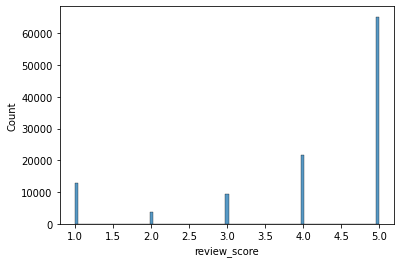

In [ ]:
sns.histplot(x='review_score', data=df_ecommerce)

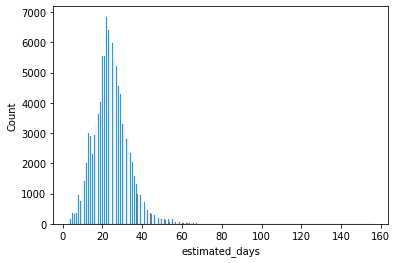

In [ ]:
sns.histplot(x='estimated_days', data=df_ecommerce)

(0.0, 2000.0)

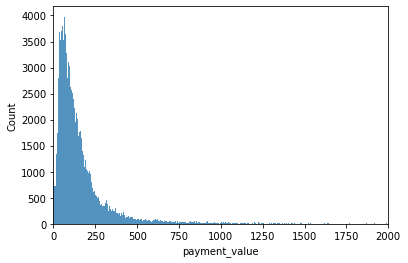

In [ ]:
sns.histplot(x='payment_value', data=df_ecommerce)
plt.xlim([0,2000])

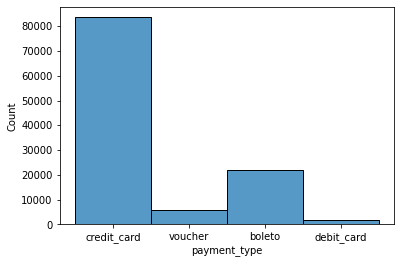

In [ ]:
sns.histplot( x='payment_type', data=df_ecommerce)
#plt.xlim([0,2000])